# Outline


## EDA Phase

    statistics indicators
    checking null values or duplicate rows
    checking types
    distinct values of columns and range of numerical columns
    does it need to ETL?
    finding abnormal datas
    some pivot table in excel ...
    
    
## Questions?

1. impact of vendor's count in delay 
2. which restaurant type has most delay in orders?
3. which city has max/min delay in orders?
4. distribution of restaurant types in cities
5. relation between experience in snappfood and rate
6. relation between delays & orders and rate
7. which type of restaurant has most orders?
8. differnece between last and first periods delays
9. restaurant subtype trends


    
## Feature Relatioins Analysis

1. matrix covariance(delay and order, delay in times)
2. barcharts(type and subtype relations)
3. city and order count analysis
4. rate and delay relation
5. rate and order relation
6. year and rate


## Data Cleaning & Feature Engineering

* feature engineering
1. seperation column values
2. calculating market share, total orders & total delays

* outlier removal
1. using plotbox  (boxplot has been built for normal distribution and we should nomalize our date by log)
2. removing outliers and records that we don't need them
3. extracting year fron Activation Time column

* duplicate removal
* normalization, starndardiztion


## ML 

1. Clustering (K-means)

- drop some columns
- standardization
- setting index
- converting to numerical data
- adding model
- finding K with elbow method
- joining data with main df

2. DT after clustering (time limitation!)


## ML Analysis

* cluster analysis 
* export results
* creating conceptual reports in powerBI



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_excel("Task.xlsx")

In [7]:
#EDA phase begins
#some EDA tasks have done in PowerBI because of specialization

df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Vendor ID        8000 non-null   int64         
 1   City             8000 non-null   object        
 2   Type             8000 non-null   object        
 3   Subtype          8000 non-null   object        
 4   Rate             8000 non-null   float64       
 5   Activation Time  8000 non-null   datetime64[ns]
 6   Commission Type  8000 non-null   int64         
 7   Order 1          8000 non-null   int64         
 8   Order 2          8000 non-null   int64         
 9   Order 3          8000 non-null   int64         
 10  Order 4          8000 non-null   int64         
 11  Order 5          8000 non-null   int64         
 12  Order 6          8000 non-null   int64         
 13  Delayed Order 1  8000 non-null   int64         
 14  Delayed Order 2  8000 non-null   int64  

In [8]:
df['Vendor ID'].unique().shape   #8000
df['City'].unique()   #many cities
df['Type'].unique() #رستوران و کافه 
df['Subtype'].unique()   
''' 
'فست فود/ایتالیایی', 'کترینگ/کبابی', 'رستوران ایرانی',
                           'بین المللی/خاص', 'کافه رستوران', 'سالاد بار/اسنک بار',
                           'سالم/گیاهی', 'طباخی', 'آش و حلیم', 'آبمیوه بستنی', 'کافی شاپ',
                           'فودکورت'
'''
df['Commission Type'].unique()  #1,2,3,4,5


array([3, 5, 1, 4, 2], dtype=int64)

In [9]:
duplicate = df[df.duplicated()]
duplicate

,Vendor ID,City,Type,Subtype,Rate,Activation Time,Commission Type,Order 1,Order 2,Order 3,...,Delayed Order 4,Delayed Order 5,Delayed Order 6,Delay Rate 1,Delay Rate 2,Delay Rate 3,Delay Rate 4,Delay Rate 5,Delay Rate 6,Training Label


In [10]:
df_null_check=df.drop(["Training Label"], axis="columns")
df_null_check.isnull().values.any()

False

In [11]:
df.groupby("Type").count()
df.groupby("Subtype").count()
df.groupby("City").count()

#EDA phase ended

,Vendor ID,Type,Subtype,Rate,Activation Time,Commission Type,Order 1,Order 2,Order 3,Order 4,...,Delayed Order 4,Delayed Order 5,Delayed Order 6,Delay Rate 1,Delay Rate 2,Delay Rate 3,Delay Rate 4,Delay Rate 5,Delay Rate 6,Training Label
City,,,,,,,,,,,,,,,,,,,,,
آرادان,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
آران وبيدگل,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
آلوني,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,1
احمدآبادصولت,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
اراك,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
پول,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,0
چادگان,558,558,558,558,558,558,558,558,558,558,...,558,558,558,558,558,558,558,558,558,2
چاه بهار,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,1


In [12]:
#Feature Engineering Phase begins

#seperating sub type column values
df_split_Subtype = df["Subtype"].str.split("/", n = 1, expand = True)
df["Subtype"]=df_split_Subtype[0]
df["Subtype2"]=df_split_Subtype[1]
df["Subtype2"].fillna("No subtype", inplace = True)
df.dtypes

Vendor ID                   int64
City                       object
Type                       object
Subtype                    object
Rate                      float64
Activation Time    datetime64[ns]
Commission Type             int64
Order 1                     int64
Order 2                     int64
Order 3                     int64
Order 4                     int64
Order 5                     int64
Order 6                     int64
Delayed Order 1             int64
Delayed Order 2             int64
Delayed Order 3             int64
Delayed Order 4             int64
Delayed Order 5             int64
Delayed Order 6             int64
Delay Rate 1              float64
Delay Rate 2              float64
Delay Rate 3              float64
Delay Rate 4              float64
Delay Rate 5              float64
Delay Rate 6              float64
Training Label             object
Subtype2                   object
dtype: object

In [13]:
#calculating some features about orders

df["total_order"]=df["Order 1"]+df["Order 2"]+df["Order 3"]+df["Order 4"]+df["Order 5"]+df["Order 6"]
df["total_delay"]=df["Delayed Order 1"]+df["Delayed Order 2"]+df["Delayed Order 3"]+df["Delayed Order 4"]+df["Delayed Order 5"]+df["Delayed Order 6"]
df


,Vendor ID,City,Type,Subtype,Rate,Activation Time,Commission Type,Order 1,Order 2,Order 3,...,Delay Rate 1,Delay Rate 2,Delay Rate 3,Delay Rate 4,Delay Rate 5,Delay Rate 6,Training Label,Subtype2,total_order,total_delay
0,1,جویبار,رستوران,فست فود,4.171388,2018-11-18 16:18:28,3,138,219,512,...,0.021739,0.000000,0.019531,0.027719,0.020619,0.009191,NaN,ایتالیایی,2545,48
1,4,جویبار,رستوران,فست فود,4.183515,2018-11-18 19:10:07,3,778,1707,1298,...,0.062982,0.015231,0.015408,0.013270,0.003540,0.003524,NaN,ایتالیایی,9577,136
2,5,جویبار,رستوران,کترینگ,3.988590,2018-11-18 21:02:02,3,45,159,128,...,0.000000,0.006289,0.015625,0.014451,0.023810,0.023585,NaN,کبابی,1016,16
3,6,جویبار,رستوران,رستوران ایرانی,3.930075,2018-11-19 06:20:47,5,49,147,104,...,0.122449,0.020408,0.067308,0.006211,0.023810,0.008772,NaN,No subtype,659,20
4,7,جویبار,رستوران,رستوران ایرانی,4.179931,2018-11-18 17:12:22,3,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,No subtype,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,11439,رودبار,رستوران,کافه رستوران,3.862069,2022-01-04 13:20:13,5,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,No subtype,0,0
7996,11441,رودبار,رستوران,فست فود,4.204545,2022-01-03 11:37:58,5,0,21,104,...,0.000000,0.047619,0.153846,0.051471,0.148438,0.067873,NaN,ایتالیایی,610,58
7997,11443,قهستان,رستوران,رستوران ایرانی,4.875000,2022-01-05 21:22:20,5,4,36,82,...,0.000000,0.027778,0.036585,0.015075,0.000000,0.000000,NaN,No subtype,494,7
7998,11445,قائميه,رستوران,رستوران ایرانی,5.000000,2021-12-29 13:11:32,5,4,18,12,...,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,NaN,No subtype,125,1


In [10]:
#Calculating Market Share for each city

#df_marketShare=df.groupby("City").sum()
#df_marketShare=df_marketShare[["total_order","total_delay"]]
#df_marketShare=df_marketShare.rename(columns = {'total_order':'total_order_city','total_delay':'total_delay_city'}, inplace = False)
#df_marketShare


In [14]:
df.groupby('City').count()

,Vendor ID,Type,Subtype,Rate,Activation Time,Commission Type,Order 1,Order 2,Order 3,Order 4,...,Delay Rate 1,Delay Rate 2,Delay Rate 3,Delay Rate 4,Delay Rate 5,Delay Rate 6,Training Label,Subtype2,total_order,total_delay
City,,,,,,,,,,,,,,,,,,,,,
آرادان,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,2,2,2
آران وبيدگل,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
آلوني,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,1,6,6,6
احمدآبادصولت,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,0,5,5,5
اراك,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,0,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
پول,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,0,27,27,27
چادگان,558,558,558,558,558,558,558,558,558,558,...,558,558,558,558,558,558,2,558,558,558
چاه بهار,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,1,11,11,11


In [23]:
##under sample
city_count = df.groupby('City').count()
city_count 
city_count[city_count['Vendor ID']>5].mean()

Vendor ID          127.564516
Type               127.564516
Subtype            127.564516
Rate               127.564516
Activation Time    127.564516
Commission Type    127.564516
Order 1            127.564516
Order 2            127.564516
Order 3            127.564516
Order 4            127.564516
Order 5            127.564516
Order 6            127.564516
Delayed Order 1    127.564516
Delayed Order 2    127.564516
Delayed Order 3    127.564516
Delayed Order 4    127.564516
Delayed Order 5    127.564516
Delayed Order 6    127.564516
Delay Rate 1       127.564516
Delay Rate 2       127.564516
Delay Rate 3       127.564516
Delay Rate 4       127.564516
Delay Rate 5       127.564516
Delay Rate 6       127.564516
Training Label       2.080645
Subtype2           127.564516
total_order        127.564516
total_delay        127.564516
dtype: float64

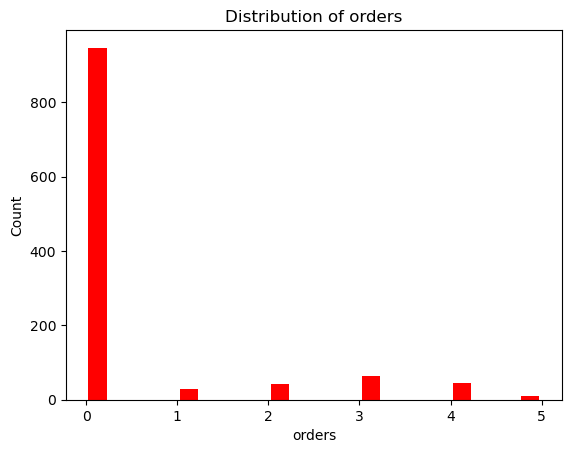

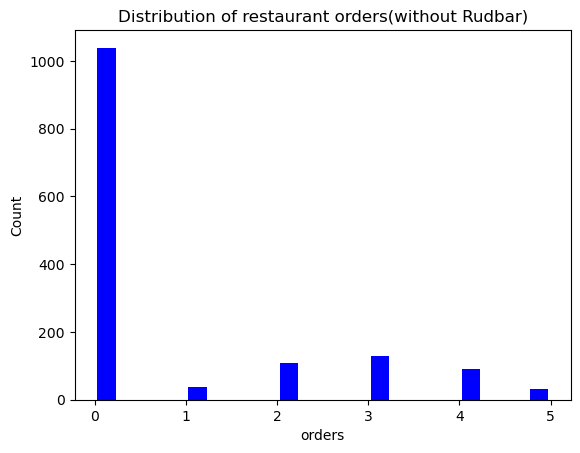

In [33]:
#Some Charts
#main charts have built in PowerBI

x=df[df['City']=='رودبار']["total_order"]  
  
bins = 20
  
plt.hist(x, bins, (0, 5), color ='red',   
        histtype = 'bar', rwidth = 0.8)

plt.xlabel('orders') 

plt.ylabel('Count') 

plt.title('Distribution of orders') 
plt.show()

x=df[df['City']!='رودبار']["total_order"]  
  
bins = 20
  
plt.hist(x, bins, (0, 5), color ='blue',   
        histtype = 'bar', rwidth = 0.8)

plt.xlabel('orders') 

plt.ylabel('Count') 

plt.title('Distribution of restaurant orders(without Rudbar)') 

plt.show()


In [46]:
#creating box plot
#boxplot has been built for normal distribution and we should nomalize our date by log

df['total_orders'] = df['total_order'].replace(0, 1)
df['total_orders'] = np.log2(df['total_orders'])
df['total_orders']

totalOrder = df["total_orders"]
totalOrder


0       11.313450
1       13.225358
2        9.988685
3        9.364135
4        2.000000
          ...    
7995     0.000000
7996     9.252665
7997     8.948367
7998     6.965784
7999     5.285402
Name: total_orders, Length: 8000, dtype: float64

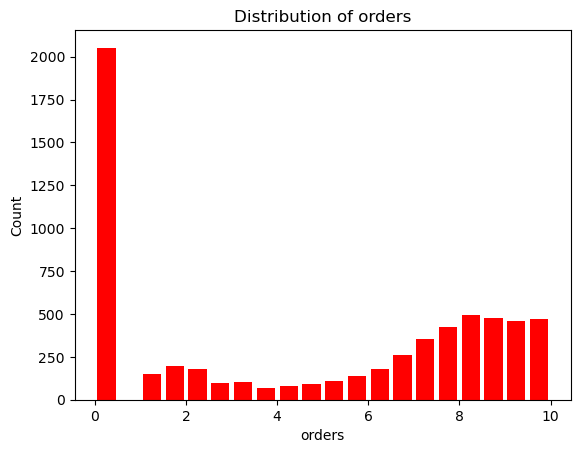

In [48]:
x=totalOrder
bins = 20
  
plt.hist(x, bins, (0, 10), color ='red',   
        histtype = 'bar', rwidth = 0.8)

plt.xlabel('orders') 

plt.ylabel('Count') 

plt.title('Distribution of orders') 
plt.show()

9.584962500721156 19.169925001442312 -9.584962500721156


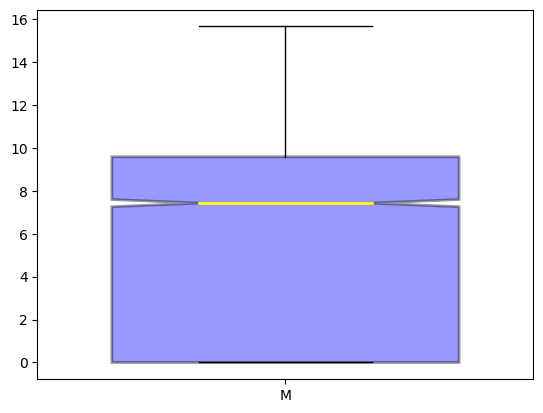

In [49]:
#creating boxplot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([totalOrder], notch = True, labels=['M'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4))
q1 = np.quantile(totalOrder, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(totalOrder, 0.75)
med = np.median(totalOrder)

# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(iqr)
lower_bound = q1-(iqr)
print(iqr, upper_bound, lower_bound)

In [15]:
outliers = df[(df['total_orders'] ==0) | (df['total_orders'] >=15)]
outliers

,Vendor ID,City,Type,Subtype,Rate,Activation Time,Commission Type,Order 1,Order 2,Order 3,...,Delay Rate 2,Delay Rate 3,Delay Rate 4,Delay Rate 5,Delay Rate 6,Training Label,Subtype2,total_order,total_delay,total_orders
8,14,جویبار,رستوران,فست فود,3.328740,2018-11-19 06:17:18,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,ایتالیایی,0,0,0.0
22,32,جویبار,رستوران,فست فود,3.955667,2018-11-18 21:03:42,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,ایتالیایی,0,0,0.0
40,60,جویبار,رستوران,فست فود,3.825189,2018-11-19 06:17:44,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,ایتالیایی,0,0,0.0
42,62,جویبار,رستوران,فست فود,4.158933,2018-11-19 06:17:39,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,ایتالیایی,0,0,0.0
47,69,جویبار,رستوران,رستوران ایرانی,3.526515,2018-11-18 19:31:00,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,No subtype,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,11423,كلور,کافه,آبمیوه بستنی,4.500000,2022-01-05 16:13:59,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,No subtype,0,0,0.0
7988,11429,ديلمان,رستوران,فست فود,4.312500,2022-01-05 19:17:51,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,ایتالیایی,0,0,0.0
7990,11433,رودبار,رستوران,فست فود,4.222222,2021-12-28 17:48:26,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,ایتالیایی,0,0,0.0
7991,11434,رودبار,رستوران,فست فود,4.500000,2021-12-29 13:25:51,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,ایتالیایی,0,0,0.0


In [50]:
df=df[df["total_order"]>0]
df

,Vendor ID,City,Type,Subtype,Rate,Activation Time,Commission Type,Order 1,Order 2,Order 3,...,Delay Rate 2,Delay Rate 3,Delay Rate 4,Delay Rate 5,Delay Rate 6,Training Label,Subtype2,total_order,total_delay,total_orders
0,1,جویبار,رستوران,فست فود,4.171388,2018-11-18 16:18:28,3,138,219,512,...,0.000000,0.019531,0.027719,0.020619,0.009191,NaN,ایتالیایی,2545,48,11.313450
1,4,جویبار,رستوران,فست فود,4.183515,2018-11-18 19:10:07,3,778,1707,1298,...,0.015231,0.015408,0.013270,0.003540,0.003524,NaN,ایتالیایی,9577,136,13.225358
2,5,جویبار,رستوران,کترینگ,3.988590,2018-11-18 21:02:02,3,45,159,128,...,0.006289,0.015625,0.014451,0.023810,0.023585,NaN,کبابی,1016,16,9.988685
3,6,جویبار,رستوران,رستوران ایرانی,3.930075,2018-11-19 06:20:47,5,49,147,104,...,0.020408,0.067308,0.006211,0.023810,0.008772,NaN,No subtype,659,20,9.364135
4,7,جویبار,رستوران,رستوران ایرانی,4.179931,2018-11-18 17:12:22,3,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,No subtype,4,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,11438,رودبار,رستوران,کترینگ,4.798319,2021-12-28 15:47:23,5,0,87,150,...,0.011494,0.020000,0.005208,0.011029,0.006250,NaN,کبابی,1181,11,10.205793
7996,11441,رودبار,رستوران,فست فود,4.204545,2022-01-03 11:37:58,5,0,21,104,...,0.047619,0.153846,0.051471,0.148438,0.067873,NaN,ایتالیایی,610,58,9.252665
7997,11443,قهستان,رستوران,رستوران ایرانی,4.875000,2022-01-05 21:22:20,5,4,36,82,...,0.027778,0.036585,0.015075,0.000000,0.000000,NaN,No subtype,494,7,8.948367
7998,11445,قائميه,رستوران,رستوران ایرانی,5.000000,2021-12-29 13:11:32,5,4,18,12,...,0.000000,0.000000,0.032258,0.000000,0.000000,NaN,No subtype,125,1,6.965784


In [17]:
#df = pd.merge(df, df_marketShare, on='City', how='inner')
#df
#df['total_delay_city'] = df['total_delay_city'].replace(0, 1)

'''
after testing model I understand taht market share calculation is not necessary
'''

'\nafter testing model I understand taht market share calculation is not necessary\n'

In [51]:
#df["market_share"]=df["total_order"]/df["total_order_city"]*100
#df["delay_by_city"]=df["total_delay"]/df["total_delay_city"]*100

#testing 

df[df["City"]=="احمدآبادصولت"]

,Vendor ID,City,Type,Subtype,Rate,Activation Time,Commission Type,Order 1,Order 2,Order 3,...,Delay Rate 2,Delay Rate 3,Delay Rate 4,Delay Rate 5,Delay Rate 6,Training Label,Subtype2,total_order,total_delay,total_orders
1275,1773,احمدآبادصولت,رستوران,فست فود,3.994709,2019-02-05 13:57:35,5,15,6,46,...,0.000000,0.043478,0.009901,0.000000,0.000000,NaN,ایتالیایی,290,3,8.179909
2900,4088,احمدآبادصولت,رستوران,کترینگ,4.215434,2020-04-18 17:24:06,5,117,168,130,...,0.017857,0.038462,0.030612,0.039216,0.006289,NaN,کبابی,1031,24,10.009829
2945,4153,احمدآبادصولت,رستوران,فست فود,4.029006,2020-05-05 17:19:26,5,76,168,144,...,0.000000,0.006944,0.020408,0.016667,0.000000,NaN,ایتالیایی,863,7,9.753217
6149,8746,احمدآبادصولت,رستوران,فست فود,4.496732,2021-11-16 20:17:05,3,39,72,80,...,0.013889,0.000000,0.000000,0.000000,0.012000,NaN,ایتالیایی,607,4,9.245553
6697,9586,احمدآبادصولت,رستوران,رستوران ایرانی,4.163265,2021-11-13 20:42:40,3,6,6,18,...,0.000000,0.055556,0.000000,0.071429,0.000000,NaN,No subtype,77,4,6.266787


In [52]:
#converting Activation Time column 

df['Activation Time'] = df['Activation Time'].dt.year 


C:\Users\surface\AppData\Local\Temp\ipykernel_15636\3248977005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Activation Time'] = df['Activation Time'].dt.year


In [53]:
#Implementing model

import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


In [55]:
df.head(5)
df.columns

Index(['Vendor ID', 'City', 'Type', 'Subtype', 'Rate', 'Activation Time',
       'Commission Type', 'Order 1', 'Order 2', 'Order 3', 'Order 4',
       'Order 5', 'Order 6', 'Delayed Order 1', 'Delayed Order 2',
       'Delayed Order 3', 'Delayed Order 4', 'Delayed Order 5',
       'Delayed Order 6', 'Delay Rate 1', 'Delay Rate 2', 'Delay Rate 3',
       'Delay Rate 4', 'Delay Rate 5', 'Delay Rate 6', 'Training Label',
       'Subtype2', 'total_order', 'total_delay', 'total_orders'],
      dtype='object')

In [56]:
#Converting to Categorical

#for dbscan model I create new table
dbscan_model=df

#drop some columns
df= df.drop(["Training Label","total_orders"], axis="columns")
df.set_index("Vendor ID",inplace=True)

df_model=df
#df_model= df_model.drop("City", axis="columns")

df_model = pd.get_dummies(df,drop_first=True)



In [ ]:
#checking null values
#df_model.isinfinite().sum().head(40)
#df2=df[df.delay_by_city.isnull()]
#df2
#df["delay_by_city"].fillna(0, inplace = True)


In [57]:
#Standardization
scaler = StandardScaler()
df_model = pd.DataFrame(scaler.fit_transform(df_model.values), columns=df_model.columns, index=df_model.index)
df_model

,Rate,Activation Time,Commission Type,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,Delayed Order 1,...,Subtype_فست فود,Subtype_فودکورت,Subtype_کافه رستوران,Subtype_کافی شاپ,Subtype_کترینگ,Subtype2_اسنک بار,Subtype2_ایتالیایی,Subtype2_خاص,Subtype2_کبابی,Subtype2_گیاهی
Vendor ID,,,,,,,,,,,,,,,,,,,,,
1,0.026637,-1.731084,-2.407555,0.232058,0.080651,1.286517,1.430519,0.218084,0.446647,0.086231,...,1.049442,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234
4,0.056543,-1.731084,-2.407555,3.518776,3.918118,4.030877,3.834466,3.548031,3.915363,6.461231,...,1.049442,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234
5,-0.424158,-1.731084,-2.407555,-0.245543,-0.074085,-0.054239,0.216239,-0.023835,-0.126295,-0.329530,...,-0.952888,-0.077602,-0.21257,-0.092481,2.092665,-0.071982,-0.952888,-0.086827,2.092665,-0.02234
6,-0.568460,-1.731084,0.379287,-0.225001,-0.105033,-0.138037,-0.163224,-0.173256,-0.295416,0.501992,...,-0.952888,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234
7,0.047705,-1.731084,-2.407555,-0.476640,-0.484137,-0.501158,-0.493459,-0.472097,-0.485246,-0.329530,...,-0.952888,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11438,1.572700,0.900327,0.379287,-0.476640,-0.259769,0.022575,-0.099638,0.495580,0.336201,-0.329530,...,-0.952888,-0.077602,-0.21257,-0.092481,2.092665,-0.071982,-0.952888,-0.086827,2.092665,-0.02234
11441,0.108405,1.777464,0.379287,-0.476640,-0.429979,-0.138037,-0.214503,-0.016720,-0.110763,-0.329530,...,1.049442,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234
11443,1.761801,1.777464,0.379287,-0.456099,-0.391295,-0.214851,-0.085280,-0.159025,-0.345462,-0.329530,...,-0.952888,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234


## DBSCAN Model


In [58]:
dbscan_model= dbscan_model.drop(["Training Label","total_orders"], axis="columns")
dbscan_model.set_index("Vendor ID",inplace=True)
dbscan_model = pd.get_dummies(df,drop_first=True)

In [59]:
scaler = StandardScaler()
dbscan_model = pd.DataFrame(scaler.fit_transform(dbscan_model.values), columns=dbscan_model.columns, index=dbscan_model.index)
dbscan_model

,Rate,Activation Time,Commission Type,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,Delayed Order 1,...,Subtype_فست فود,Subtype_فودکورت,Subtype_کافه رستوران,Subtype_کافی شاپ,Subtype_کترینگ,Subtype2_اسنک بار,Subtype2_ایتالیایی,Subtype2_خاص,Subtype2_کبابی,Subtype2_گیاهی
Vendor ID,,,,,,,,,,,,,,,,,,,,,
1,0.026637,-1.731084,-2.407555,0.232058,0.080651,1.286517,1.430519,0.218084,0.446647,0.086231,...,1.049442,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234
4,0.056543,-1.731084,-2.407555,3.518776,3.918118,4.030877,3.834466,3.548031,3.915363,6.461231,...,1.049442,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234
5,-0.424158,-1.731084,-2.407555,-0.245543,-0.074085,-0.054239,0.216239,-0.023835,-0.126295,-0.329530,...,-0.952888,-0.077602,-0.21257,-0.092481,2.092665,-0.071982,-0.952888,-0.086827,2.092665,-0.02234
6,-0.568460,-1.731084,0.379287,-0.225001,-0.105033,-0.138037,-0.163224,-0.173256,-0.295416,0.501992,...,-0.952888,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234
7,0.047705,-1.731084,-2.407555,-0.476640,-0.484137,-0.501158,-0.493459,-0.472097,-0.485246,-0.329530,...,-0.952888,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11438,1.572700,0.900327,0.379287,-0.476640,-0.259769,0.022575,-0.099638,0.495580,0.336201,-0.329530,...,-0.952888,-0.077602,-0.21257,-0.092481,2.092665,-0.071982,-0.952888,-0.086827,2.092665,-0.02234
11441,0.108405,1.777464,0.379287,-0.476640,-0.429979,-0.138037,-0.214503,-0.016720,-0.110763,-0.329530,...,1.049442,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234
11443,1.761801,1.777464,0.379287,-0.456099,-0.391295,-0.214851,-0.085280,-0.159025,-0.345462,-0.329530,...,-0.952888,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234


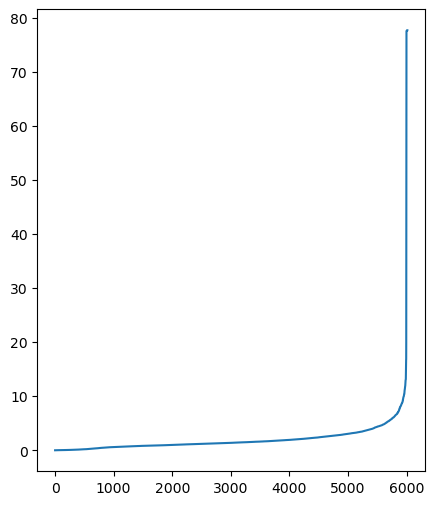

In [61]:
#finding EPS & min samples

from sklearn.neighbors import NearestNeighbors
import numpy as np

nn = NearestNeighbors(n_neighbors=4) # minimum points -1
nbrs = nn.fit(dbscan_model)
distances, indices = nbrs.kneighbors(dbscan_model)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

import matplotlib.pyplot as plt

plt.figure(figsize=(5,6))
plt.plot(distances)

plt.show();

In [62]:

dbscan_model = pd.DataFrame(scaler.fit_transform(dbscan_model.values), columns=dbscan_model.columns, index=dbscan_model.index)
dbs = DBSCAN(eps=10, min_samples=145)
dbs.fit(dbscan_model)
labels = dbs.labels_

dbscan_model['labels'] = labels
dbscan_model['labels'].unique()
dbscan_model


,Rate,Activation Time,Commission Type,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,Delayed Order 1,...,Subtype_فودکورت,Subtype_کافه رستوران,Subtype_کافی شاپ,Subtype_کترینگ,Subtype2_اسنک بار,Subtype2_ایتالیایی,Subtype2_خاص,Subtype2_کبابی,Subtype2_گیاهی,labels
Vendor ID,,,,,,,,,,,,,,,,,,,,,
1,0.026637,-1.731084,-2.407555,0.232058,0.080651,1.286517,1.430519,0.218084,0.446647,0.086231,...,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234,0
4,0.056543,-1.731084,-2.407555,3.518776,3.918118,4.030877,3.834466,3.548031,3.915363,6.461231,...,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234,0
5,-0.424158,-1.731084,-2.407555,-0.245543,-0.074085,-0.054239,0.216239,-0.023835,-0.126295,-0.329530,...,-0.077602,-0.21257,-0.092481,2.092665,-0.071982,-0.952888,-0.086827,2.092665,-0.02234,0
6,-0.568460,-1.731084,0.379287,-0.225001,-0.105033,-0.138037,-0.163224,-0.173256,-0.295416,0.501992,...,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234,0
7,0.047705,-1.731084,-2.407555,-0.476640,-0.484137,-0.501158,-0.493459,-0.472097,-0.485246,-0.329530,...,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11438,1.572700,0.900327,0.379287,-0.476640,-0.259769,0.022575,-0.099638,0.495580,0.336201,-0.329530,...,-0.077602,-0.21257,-0.092481,2.092665,-0.071982,-0.952888,-0.086827,2.092665,-0.02234,0
11441,0.108405,1.777464,0.379287,-0.476640,-0.429979,-0.138037,-0.214503,-0.016720,-0.110763,-0.329530,...,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234,0
11443,1.761801,1.777464,0.379287,-0.456099,-0.391295,-0.214851,-0.085280,-0.159025,-0.345462,-0.329530,...,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234,-1


In [63]:
dbscan_model.reset_index(inplace=True)
dbscan_model=dbscan_model[["Vendor ID","labels"]]
dbscan_model

,Vendor ID,labels
0,1,0
1,4,0
2,5,0
3,6,0
4,7,0
...,...,...
6009,11438,0
6010,11441,0
6011,11443,-1
6012,11445,0


In [64]:
dbscan=pd.merge(dbscan_model, df, on='Vendor ID', how='inner')
dbscan

,Vendor ID,labels,City,Type,Subtype,Rate,Activation Time,Commission Type,Order 1,Order 2,...,Delayed Order 6,Delay Rate 1,Delay Rate 2,Delay Rate 3,Delay Rate 4,Delay Rate 5,Delay Rate 6,Subtype2,total_order,total_delay
0,1,0,جویبار,رستوران,فست فود,4.171388,2018,3,138,219,...,5,0.021739,0.000000,0.019531,0.027719,0.020619,0.009191,ایتالیایی,2545,48
1,4,0,جویبار,رستوران,فست فود,4.183515,2018,3,778,1707,...,9,0.062982,0.015231,0.015408,0.013270,0.003540,0.003524,ایتالیایی,9577,136
2,5,0,جویبار,رستوران,کترینگ,3.988590,2018,3,45,159,...,5,0.000000,0.006289,0.015625,0.014451,0.023810,0.023585,کبابی,1016,16
3,6,0,جویبار,رستوران,رستوران ایرانی,3.930075,2018,5,49,147,...,1,0.122449,0.020408,0.067308,0.006211,0.023810,0.008772,No subtype,659,20
4,7,0,جویبار,رستوران,رستوران ایرانی,4.179931,2018,3,0,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No subtype,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,11438,0,رودبار,رستوران,کترینگ,4.798319,2021,5,0,87,...,3,0.000000,0.011494,0.020000,0.005208,0.011029,0.006250,کبابی,1181,11
6010,11441,0,رودبار,رستوران,فست فود,4.204545,2022,5,0,21,...,15,0.000000,0.047619,0.153846,0.051471,0.148438,0.067873,ایتالیایی,610,58
6011,11443,-1,قهستان,رستوران,رستوران ایرانی,4.875000,2022,5,4,36,...,0,0.000000,0.027778,0.036585,0.015075,0.000000,0.000000,No subtype,494,7
6012,11445,0,قائميه,رستوران,رستوران ایرانی,5.000000,2021,5,4,18,...,0,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,No subtype,125,1


In [65]:
dbscan.to_excel("dbscan.xlsx")

## Kmeans Model

In [66]:
kmeans_model = KMeans(n_clusters=4)
clusters = kmeans_model.fit_predict(df_model)
df_model.insert(df_model.columns.get_loc("Rate"), "Cluster", clusters)
df_model.head(50)


,Cluster,Rate,Activation Time,Commission Type,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,...,Subtype_فست فود,Subtype_فودکورت,Subtype_کافه رستوران,Subtype_کافی شاپ,Subtype_کترینگ,Subtype2_اسنک بار,Subtype2_ایتالیایی,Subtype2_خاص,Subtype2_کبابی,Subtype2_گیاهی
Vendor ID,,,,,,,,,,,,,,,,,,,,,
1,2,0.026637,-1.731084,-2.407555,0.232058,0.080651,1.286517,1.430519,0.218084,0.446647,...,1.049442,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234
4,1,0.056543,-1.731084,-2.407555,3.518776,3.918118,4.030877,3.834466,3.548031,3.915363,...,1.049442,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234
5,0,-0.424158,-1.731084,-2.407555,-0.245543,-0.074085,-0.054239,0.216239,-0.023835,-0.126295,...,-0.952888,-0.077602,-0.21257,-0.092481,2.092665,-0.071982,-0.952888,-0.086827,2.092665,-0.02234
6,3,-0.568460,-1.731084,0.379287,-0.225001,-0.105033,-0.138037,-0.163224,-0.173256,-0.295416,...,-0.952888,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234
7,3,0.047705,-1.731084,-2.407555,-0.476640,-0.484137,-0.501158,-0.493459,-0.472097,-0.485246,...,-0.952888,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234
9,2,-0.491210,-1.731084,-2.407555,-0.147969,-0.221085,-0.249766,-0.321162,-0.315561,-0.243644,...,1.049442,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,1.049442,-0.086827,-0.477859,-0.02234
11,3,-0.194662,-1.731084,-2.407555,-0.445828,-0.460927,-0.347530,-0.386799,-0.422290,-0.397234,...,-0.952888,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234
13,3,-0.307951,-1.731084,0.379287,-0.183917,0.173493,0.553291,0.554678,0.210969,0.277526,...,-0.952888,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,-0.086827,-0.477859,-0.02234
15,3,-0.393985,-1.731084,-2.407555,-0.199324,-0.120506,-0.193901,-0.085280,-0.052296,-0.103860,...,-0.952888,-0.077602,-0.21257,-0.092481,-0.477859,-0.071982,-0.952888,11.517137,-0.477859,-0.02234


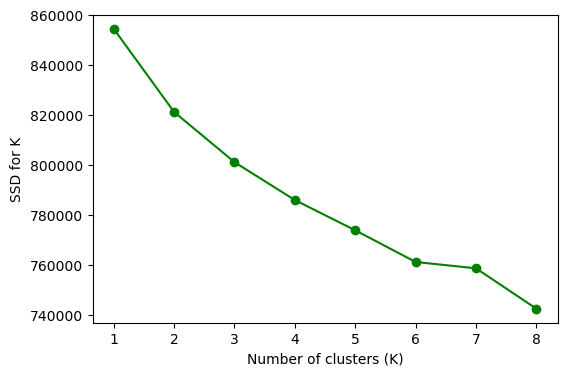

In [67]:
ssd = []
for k in range(1, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_model)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(1, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

In [68]:
df_model.reset_index(inplace=True)
df_model=df_model[["Vendor ID","Cluster"]]
df_model

,Vendor ID,Cluster
0,1,2
1,4,1
2,5,0
3,6,3
4,7,3
...,...,...
6009,11438,0
6010,11441,2
6011,11443,3
6012,11445,3


In [69]:
result=pd.merge(df_model, df, on='Vendor ID', how='inner')
result

,Vendor ID,Cluster,City,Type,Subtype,Rate,Activation Time,Commission Type,Order 1,Order 2,...,Delayed Order 6,Delay Rate 1,Delay Rate 2,Delay Rate 3,Delay Rate 4,Delay Rate 5,Delay Rate 6,Subtype2,total_order,total_delay
0,1,2,جویبار,رستوران,فست فود,4.171388,2018,3,138,219,...,5,0.021739,0.000000,0.019531,0.027719,0.020619,0.009191,ایتالیایی,2545,48
1,4,1,جویبار,رستوران,فست فود,4.183515,2018,3,778,1707,...,9,0.062982,0.015231,0.015408,0.013270,0.003540,0.003524,ایتالیایی,9577,136
2,5,0,جویبار,رستوران,کترینگ,3.988590,2018,3,45,159,...,5,0.000000,0.006289,0.015625,0.014451,0.023810,0.023585,کبابی,1016,16
3,6,3,جویبار,رستوران,رستوران ایرانی,3.930075,2018,5,49,147,...,1,0.122449,0.020408,0.067308,0.006211,0.023810,0.008772,No subtype,659,20
4,7,3,جویبار,رستوران,رستوران ایرانی,4.179931,2018,3,0,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No subtype,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,11438,0,رودبار,رستوران,کترینگ,4.798319,2021,5,0,87,...,3,0.000000,0.011494,0.020000,0.005208,0.011029,0.006250,کبابی,1181,11
6010,11441,2,رودبار,رستوران,فست فود,4.204545,2022,5,0,21,...,15,0.000000,0.047619,0.153846,0.051471,0.148438,0.067873,ایتالیایی,610,58
6011,11443,3,قهستان,رستوران,رستوران ایرانی,4.875000,2022,5,4,36,...,0,0.000000,0.027778,0.036585,0.015075,0.000000,0.000000,No subtype,494,7
6012,11445,3,قائميه,رستوران,رستوران ایرانی,5.000000,2021,5,4,18,...,0,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,No subtype,125,1


In [ ]:
#result.to_excel("result.xlsx")